# Project Title : Traffic Data in Maryland County (Working File)

### Recap : The Data Science Workflow

![Data Science Workflow](./assets/images/data-science-workflow.png)

### Step 1: Framing the Problem

Experts claim a high proportion of traffic violations lead to traffic accidents. We need to identify the driver behavior and profile which lead to accidents and develop mitigation measures to reduce them. 

**Null Hypothesis : There is a correlation between a certain driver profile/behavior and traffic violations.**

**Alternative Hypothesis : There is no correlation between a certain driver profile/behavior and traffic violations.**

### Step 2: Select, import, explore, and clean your data

Data set obtained from Kaggle. 

This data set contains all events of Maryland county traffic violations from 2012 to 2018. It has about 1.04 million records.

In [1]:
# Import all relevant libraries and classes for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display everything without trunacting no. of columns
pd.set_option('display.height', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = pd.read_csv('traffic.csv')

/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Check to see whether data was imported correctly
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015.0,MINI COOPER,2S,WHITE,Citation,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [3]:
data.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

In [4]:
# Large dataset, close to 1.3 million instances across 35 features
data.shape

(1292399, 35)

In [5]:
# Preliminary describe not helpful because python does not recognise much of the entries within the dataset.
# We would need to do a conversion of our shortlisted features for analysis.
data.describe()

,Latitude,Longitude,Year
count,1.197045e+06,1.197045e+06,1.284325e+06
mean,3.907435e+01,-7.710341e+01,2.005139e+03
std,1.062592e+00,9.588788e-01,8.720162e+01
min,-9.461099e+01,-1.512560e+02,0.000000e+00
25%,3.903149e+01,-7.719467e+01,2.002000e+03
50%,3.907336e+01,-7.709332e+01,2.006000e+03
75%,3.913867e+01,-7.704381e+01,2.011000e+03
max,7.718716e+01,4.151207e+01,9.999000e+03


In [6]:
# Since we have such a large number of data, we can afford to drop the blanks rows. 
data.isnull().sum()

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [7]:
data_new = data.dropna(subset=['Make', 'Description', 'Color'])

In [8]:
data_new.isnull().sum()

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    0
Location                       2
Latitude                   94421
Longitude                  94421
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                           0
Make                           0
Model                        128
Color                          0
Violation Type                 0
Charge                         0
Article                    64747
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [9]:
data_new.shape

(1276248, 35)

### Selected features to be used for analysis

**Variable : Reckless Driving Behavior (obtained from Description Column)**
1. Alcohol (search term = alcohol, drink)
2. Mobile phone, distracted driving (search term = phone, distract)
3. Speeding (search term = speed)
4. Fail to obey stop sign (search term = fail, stop)

**Variable : Driver Profile**
1. Gender
2. Car Brand
3. Race
4. Car Colour

**Response/Target Variable : Contributed To Accident**

### Cleaning up the data

In [10]:
# Proceed to do data cleaning for EDA.

# Convert objects in 'Contributed To Accident' column into a string.
data_new['Contributed To Accident'] = data_new['Contributed To Accident'].astype(str)
data_new['Contributed To Accident'] = data_new['Contributed To Accident'].map({'Yes':1, 'No':0})

/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
data_new['Contributed To Accident'].value_counts().sort_index()

0    1245493
1      30755
Name: Contributed To Accident, dtype: int64

In [12]:
# Percentage of violations that result in accidents

Baseline = 1245493/(1245493+30755)
print(Baseline)

# This is also called the baseline accuracy for our upcoming models. 
# The model must be at least 97.6% accurate!

0.9759020190433207


In [13]:
# Convert all column objects to string for manipulation later on.
data_new[["Gender", "Race", "Make", "Color"]] = data_new[["Gender", "Race", "Make", "Color"]].astype(str)

/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
data_new['Gender'].value_counts().sort_index()

# Have to drop 'U - Unknown' genders for analysis purposes.

F    419654
M    855162
U      1432
Name: Gender, dtype: int64

In [15]:
data_new = data_new[data_new.Gender != 'U']
data_new['Gender'].value_counts().sort_index()

F    419654
M    855162
Name: Gender, dtype: int64

In [16]:
data_new['Color'].value_counts()

# We will narrow down to the top 10 colors.

BLACK          259244
SILVER         236637
WHITE          197239
GRAY           140942
RED            101615
BLUE            94740
GREEN           49484
GOLD            41098
BLUE, DARK      27061
TAN             27002
MAROON          22367
BLUE, LIGHT     17206
BEIGE           15042
GREEN, DK       14414
GREEN, LGT       7334
BROWN            6001
YELLOW           4881
ORANGE           4523
BRONZE           2959
PURPLE           2520
MULTICOLOR       1020
CREAM             834
COPPER            414
PINK              188
CHROME             27
CAMOUFLAGE         24
Name: Color, dtype: int64

In [17]:
counts = data_new['Color'].value_counts()
data_new = data_new[data_new['Color'].isin(counts[counts > 10000].index)]
data_new['Color'].value_counts()

BLACK          259244
SILVER         236637
WHITE          197239
GRAY           140942
RED            101615
BLUE            94740
GREEN           49484
GOLD            41098
BLUE, DARK      27061
TAN             27002
MAROON          22367
BLUE, LIGHT     17206
BEIGE           15042
GREEN, DK       14414
Name: Color, dtype: int64

In [18]:
data_new['Race'].value_counts().sort_index()

ASIAN               73135
BLACK              391564
HISPANIC           262749
NATIVE AMERICAN      2800
OTHER               65013
WHITE              448830
Name: Race, dtype: int64

In [19]:
data_new['Make'].value_counts(sort=True,ascending=True)
# 'Car Make' column contains plenty of spelling errors. This will inadertantly skew the analysis and affect the accuracy of the model.
# We will need to do quite a fair bit of NLP on this column if we were to include into the model.
# We will try to do a direct fit first and see the results. 

LAMBO                   1
MITSUBESHI              1
LND ROVER               1
METZ                    1
INGINITY                1
LEXUS 4S                1
JEEPD                   1
CHRSY                   1
VOLKS WAGAN             1
MERZEDE                 1
PHB                     1
C HEV                   1
MAZDVAL2014             1
ROGUE                   1
JUGAR                   1
HONDA4                  1
EXPEDITION              1
MERCURAY                1
MAZDS                   1
AQCURA                  1
SUZUZI                  1
CHEVORLEY               1
KONA                    1
HYUNDAO                 1
INFINTIT                1
ASM                     1
LEVU                    1
AMTI                    1
HYUNVAL2000             1
OUTB                    1
NISU                    1
PTR8                    1
SUBRUR                  1
'NISSAN                 1
EDMP                    1
TOYOYT                  1
STCR                    1
HONDACAMRY              1
MIN COOPER  

In [20]:
counts = data_new['Make'].value_counts(sort=True,ascending=True)
data_new = data_new[data_new['Make'].isin(counts[counts > 20000].index)]
data_new['Make'].value_counts(sort=True,ascending=True)

HYUNDAI       23454
CHEVROLET     26539
NISS          27629
JEEP          27891
ACURA         28598
CHEVY         28970
DODGE         33518
BMW           34839
CHEV          38334
HOND          47293
NISSAN        66382
TOYT          70684
FORD         117221
HONDA        134288
TOYOTA       141900
Name: Make, dtype: int64

In [21]:
data_new.shape

(847540, 35)

In [22]:
# We will need to try to make sense out of the 'Description' and 'Car Make' columns.

data_new['Description'] = data_new['Description'].astype(str)
data_new['Description'].str.contains('ALCOHOL').value_counts()

False    815060
True      32480
Name: Description, dtype: int64

In [23]:
data_new['Description'].str.contains('PHONE','DISTRACTED').value_counts()

False    825409
True      22131
Name: Description, dtype: int64

In [24]:
data_new['Description'].str.contains('SPEED').value_counts()

False    713179
True     134361
Name: Description, dtype: int64

In [25]:
data_new['Description'].str.contains('FAIL','STOP').value_counts()

False    523835
True     323705
Name: Description, dtype: int64

In [26]:
# We attempt to split the 'description' column up into interpretable variables

def is_alcohol(sentence):
    if 'ALCOHOL' in sentence:
        return 1
    if 'DRINK' in sentence:
        return 1
    return 0

data_new['Alcohol'] = data_new['Description'].apply(is_alcohol)

In [27]:
# Doing the same for Phone

def is_phone(sentence):
    if 'PHONE' in sentence:
        return 1
    if 'DISTRACT' in sentence:
        return 1
    return 0

data_new['Phone'] = data_new['Description'].apply(is_phone)

In [28]:
# Doing the same for Speeding

def is_speeding(sentence):
    if 'SPEED' in sentence:
        return 1
    return 0

data_new['Speeding'] = data_new['Description'].apply(is_speeding)

In [29]:
# Doing the same for Epic Fail

def is_fail(sentence):
    if 'FAIL' in sentence:
        return 1
    if 'STOP' in sentence:
        return 1
    return 0

data_new['Epic Fail'] = data_new['Description'].apply(is_fail)

In [30]:
# Before proceeding on further, we will drop all unnecessary coulmns from the remaining dataset.

col_interest = ['Make', 'Gender', 'Race', 'Color', 'Contributed To Accident', 'Alcohol', 'Phone', 'Speeding', 'Epic Fail']

data_final = data_new[col_interest]

In [31]:
data_final.shape

(847540, 9)

In [32]:
data_final.head()

# Data all cleaned and ready to go!

,Make,Gender,Race,Color,Contributed To Accident,Alcohol,Phone,Speeding,Epic Fail
0,FORD,M,BLACK,BLACK,0,0,0,0,0
1,TOYOTA,F,WHITE,GREEN,0,0,0,0,1
2,HONDA,F,BLACK,SILVER,0,0,0,0,1
5,HYUNDAI,F,WHITE,GRAY,0,0,0,0,0
6,FORD,M,HISPANIC,BLACK,0,0,0,0,0


In [33]:
data_final.dtypes

Make                       object
Gender                     object
Race                       object
Color                      object
Contributed To Accident     int64
Alcohol                     int64
Phone                       int64
Speeding                    int64
Epic Fail                   int64
dtype: object

### Step 3: Structure, Visualise and Complete Your Analysis

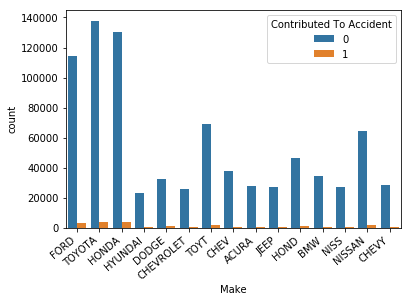

In [34]:
# Before we proceed with more feature engineering, we shall do a bar chart plot to see how the data pans out.

# Create Feature Columns.
feature_col = ['Alcohol', 'Phone', 'Speeding', 'Epic Fail', 'Make', 'Gender', 'Race', 'Color']

# We will try plotting some charts to visualise the data. The best option would be to probably plot the counts of contributions to accident for each feature.
ax = sns.countplot(x='Make', hue='Contributed To Accident', data=data_final.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

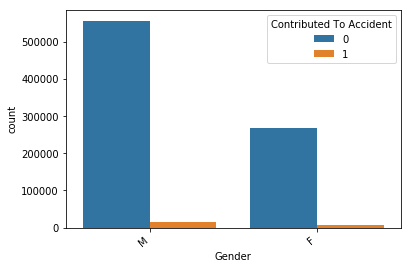

In [35]:
# Plotting the bar chart...
ax = sns.countplot(x='Gender', hue='Contributed To Accident', data=data_final.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

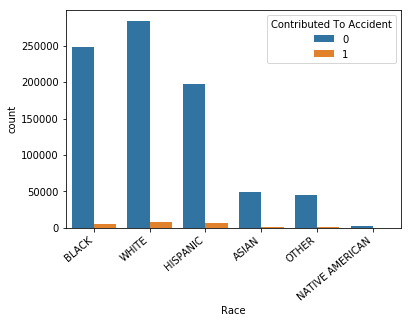

In [36]:
# Plotting the bar chart...
ax = sns.countplot(x='Race', hue='Contributed To Accident', data=data_final.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

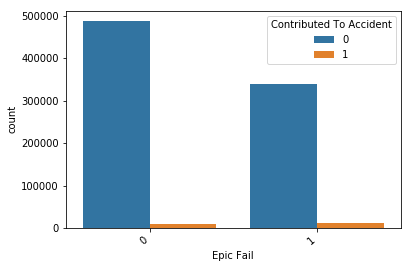

In [37]:
# Plotting the bar chart...
ax = sns.countplot(x='Epic Fail', hue='Contributed To Accident', data=data_final.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

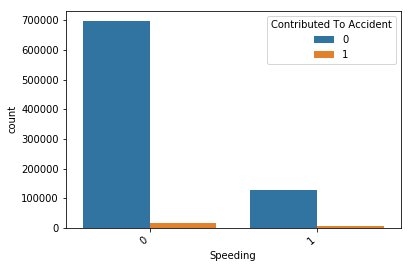

In [38]:
# Plotting the bar chart...
ax = sns.countplot(x='Speeding', hue='Contributed To Accident', data=data_final.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# As we can see, the imbalanced dataset is hampering us from visualising correctly. 
# Even if we had balanced data, we would need to quantify the weightage of each feature in contribution to an accident.

In [39]:
# We will now proceed with feature engineering for the 4 categorical columns using the pandas.getdummies feature.

make_dummies = pd.get_dummies(data_final['Make'], prefix='Make')
gender_dummies = pd.get_dummies(data_final['Gender'], prefix='Gender')
race_dummies = pd.get_dummies(data_final['Race'], prefix='Race')
color_dummies = pd.get_dummies(data_final['Color'], prefix='Color')

# Drop the first column for all the dummy variable set of columns.
make_dummies.drop(make_dummies.columns[0], axis=1, inplace=True)
gender_dummies.drop(gender_dummies.columns[0], axis=1, inplace=True)
race_dummies.drop(race_dummies.columns[0], axis=1, inplace=True)
color_dummies.drop(color_dummies.columns[0], axis=1, inplace=True)

In [40]:
# Double check whether the columns are dropped correctly.

make_dummies.head()

,Make_BMW,Make_CHEV,Make_CHEVROLET,Make_CHEVY,Make_DODGE,Make_FORD,Make_HOND,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_NISS,Make_NISSAN,Make_TOYOTA,Make_TOYT
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:
d_column = ['make_dummies', 'gender_dummies', 'race_dummies', 'color_dummies']

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
data_dummies = pd.concat([data_final, make_dummies, gender_dummies, race_dummies, color_dummies], axis=1)

data_dummies.head(5)

# Great! Now we can start to build the model!

,Make,Gender,Race,Color,Contributed To Accident,Alcohol,Phone,Speeding,Epic Fail,Make_BMW,Make_CHEV,Make_CHEVROLET,Make_CHEVY,Make_DODGE,Make_FORD,Make_HOND,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_NISS,Make_NISSAN,Make_TOYOTA,Make_TOYT,Gender_M,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,Color_BLACK,Color_BLUE,"Color_BLUE, DARK","Color_BLUE, LIGHT",Color_GOLD,Color_GRAY,Color_GREEN,"Color_GREEN, DK",Color_MAROON,Color_RED,Color_SILVER,Color_TAN,Color_WHITE
0,FORD,M,BLACK,BLACK,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,TOYOTA,F,WHITE,GREEN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,HONDA,F,BLACK,SILVER,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,HYUNDAI,F,WHITE,GRAY,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,FORD,M,HISPANIC,BLACK,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
list(data_dummies)

['Make',
 'Gender',
 'Race',
 'Color',
 'Contributed To Accident',
 'Alcohol',
 'Phone',
 'Speeding',
 'Epic Fail',
 'Make_BMW',
 'Make_CHEV',
 'Make_CHEVROLET',
 'Make_CHEVY',
 'Make_DODGE',
 'Make_FORD',
 'Make_HOND',
 'Make_HONDA',
 'Make_HYUNDAI',
 'Make_JEEP',
 'Make_NISS',
 'Make_NISSAN',
 'Make_TOYOTA',
 'Make_TOYT',
 'Gender_M',
 'Race_BLACK',
 'Race_HISPANIC',
 'Race_NATIVE AMERICAN',
 'Race_OTHER',
 'Race_WHITE',
 'Color_BLACK',
 'Color_BLUE',
 'Color_BLUE, DARK',
 'Color_BLUE, LIGHT',
 'Color_GOLD',
 'Color_GRAY',
 'Color_GREEN',
 'Color_GREEN, DK',
 'Color_MAROON',
 'Color_RED',
 'Color_SILVER',
 'Color_TAN',
 'Color_WHITE']

### Building the Model : Logistic Regression

A **logistic regression** model will be used to fit the data. This model was chosen because it is a classification problem and we can obtain the probablities/likelihood of accidents occuring from each feature.

Steps for Model Building as Follows:
1. Create X and y feature columns
2. Import the model class
3. Instantiate an object from the class
4. Fit the columns to the model
5. Predict the response for a new observation

We will do a train-test-fit of the entire dataset for the first run and get the model score before proceeding to do post-processing such as cross-validation and SMOTE/TOMEK. 

In [43]:
feature_cols = ['Alcohol', 'Phone','Speeding', 'Epic Fail', 'Make_BMW', 'Make_CHEV', 'Make_CHEVROLET', 'Make_CHEVY', 'Make_DODGE', 'Make_FORD', 'Make_HOND', 'Make_HONDA', 'Make_HYUNDAI', 'Make_JEEP', 'Make_NISS', 'Make_NISSAN', 'Make_TOYOTA', 'Make_TOYT', 'Gender_M', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN', 'Race_OTHER', 'Race_WHITE', 'Color_BLACK', 'Color_BLUE', 'Color_BLUE, DARK', 'Color_BLUE, LIGHT', 'Color_GOLD', 'Color_GRAY', 'Color_GREEN', 'Color_GREEN, DK', 'Color_MAROON', 'Color_RED', 'Color_SILVER', 'Color_TAN', 'Color_WHITE']
X = data_dummies[feature_cols]
y = data_dummies['Contributed To Accident']


In [44]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))
print(X.shape)
print(y.shape)

# Step 1 done! : Feature and Response columns all set for model fitting!

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(847540, 37)
(847540,)


In [45]:
# Step 2 done! : Import model class

from sklearn.linear_model import LogisticRegression

# Step 3 done! : Instantiate an object from the class

LR = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_ori, y_train, y_ori = train_test_split(X,y, random_state=5)

# Step 4 done! : Fitting the data to the model and test

LR.fit(X_train,y_train)

y_pred = LR.predict(X_ori)

LR.score(X_ori, y_ori)

0.975156334804257

In [46]:
data_dummies['Contributed To Accident'].value_counts().sort_index()

# The above model score is BARELY better than the 0.97490148 score of the actual data! We need to do something!

0    826268
1     21272
Name: Contributed To Accident, dtype: int64

In [47]:
# Double checking the number of instances for the test set.

print(y_ori.shape)
print(y_pred.shape)

(211885,)
(211885,)


In [48]:
# Summarising the Test results of the above model via the two standard reports.

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_ori, y_pred)) 
# The results are terrible, the model basically predicted everything to be negative. 
# It did not manage to predict the factors which will lead to accidents.

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    206621
          1       0.00      0.00      0.00      5264

avg / total       0.95      0.98      0.96    211885



/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
LR_pred_proba = LR.predict_proba(X_ori)[:,1]
metrics.confusion_matrix(y_true=y_ori, y_pred=LR_pred_proba > .95)

# There are no true positives detected! Furthermore, there are quite a few false positives detected.
# The imblanced dataset is severing affectin the model's ability to predict accurately!

array([[206621,      0],
       [  5264,      0]])

### Refining the Model 

The cause of the poor predictive power of the initital Logistic Regression model is likely due to the highly imbalanced dataset. 

We will now apply SMOTE-TOMEK to see if it makes a difference.

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind = "regular", random_state=5)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

# Check the data set after doing it.
print(X_sm.shape)
print(y_sm.shape)

# We decided to only use SMOTE as it took too long to do both. Tomek has some issues.

(1239294, 37)
(1239294,)


In [51]:
# Repeat Model Building Steps for SMOTE datasets.

from sklearn.linear_model import LogisticRegression
LR_new = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, random_state=5)
LR_new.fit(X_train,y_train)

y_pred = LR_new.predict(X_ori)

LR_new.score(X_ori, y_ori)

0.590424050782264

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_ori, y_pred)) 

# Success! Considering the fact that the target variable was a 50/50 split, a 60% precision and recall score was obtained.

             precision    recall  f1-score   support

          0       0.98      0.59      0.74    206621
          1       0.04      0.65      0.07      5264

avg / total       0.96      0.59      0.72    211885



In [53]:
from sklearn.metrics import confusion_matrix
LR_new_pred_proba = LR_new.predict_proba(X_ori)[:,1]
metrics.confusion_matrix(y_true=y_ori, y_pred=LR_new_pred_proba > .5) # Reset standard probability check back to 0.5.

# Interpreting the Confusion matrix below:
# There are 121706 True Positives (TP) and 3396 True Negatives (TP). Model accuracy = (TN+TP)/Total znumber of Observations = 0.617..
# Bottom left value of 1868 refers to false positives. Precision = TP/(TP+FP)
# Top right value of 84915 refers to false negatives. Recall = TP/(TP+FN)


array([[121706,  84915],
       [  1868,   3396]])

In [54]:
# Cross validation check as part of good practice.

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
#kf = model_selection.KFold(n_splits=5, shuffle=True, random state=5)

k_fold = KFold(len(y_sm), n_folds=10, shuffle=True, random_state=5)
#print cross_val_score(clf, X, y, cv=k_fold, n_jobs=1)

LR_new2 = LogisticRegression()
scores = cross_val_score(LR_new2, X_sm, y_sm, cv=k_fold)
print(np.mean(scores))                                           

/Users/matthewloh60/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6156577847677999


### Step 4: Make Recommendations and Business Decisions from Your Data

Recap : The objective of building the above model is to find which driver profile/behavior will most likely lead to traffic accidents.

By building a logistic regression model, we can use the cofficients of the different variables to find a combination of profiles/behvior that will most likely cause accidents.

In [55]:
import pandas as pd
coefficients = LR_new.coef_ # List of Coefficients
df3 = pd.DataFrame(coefficients)
df3 = df3.values[0].tolist()

df_coeff= pd.DataFrame({'LogCoeff': df3})

In [56]:
# Calculate the probability weightage of each predictor in contribution to an accident. 

logodds = LR_new.intercept_ + LR_new.coef_
odds = np.exp(logodds)
prob = odds/(1 + odds)

df4 = pd.DataFrame(prob)
df4 = df4.values[0].tolist()

df_prob= pd.DataFrame({'Probability Weightage': df4}) # Create a dataframe of probabilities.

In [57]:
# Obtain a list of coefficients from the Model
# Create a dataframe with just the coefficients, variables and probabilities. 
# Initiate a mathetical operator on the coeeficients to convert them to probabilities

df = data_dummies[feature_cols].columns.get_values()
df_header = pd.DataFrame(df.tolist()) # List of Header names
df_header.columns =['Predictor Variables'] # Change the Column name
df_final = pd.concat([df_header, df_coeff, df_prob], axis=1) # Concatenate the two df columns 
Summary=df_final.sort_values(by=['Probability Weightage'], ascending=False)
Summary

,Predictor Variables,LogCoeff,Probability Weightage
0,Alcohol,1.696946,0.775381
3,Epic Fail,0.918820,0.613210
2,Speeding,0.618712,0.540093
21,Race_NATIVE AMERICAN,0.365384,0.476864
20,Race_HISPANIC,0.262461,0.451272
31,"Color_GREEN, DK",0.116332,0.415406
23,Race_WHITE,0.114019,0.414844
18,Gender_M,0.091896,0.409484
30,Color_GREEN,0.016151,0.391302
35,Color_TAN,-0.036698,0.378789


In [58]:
# Calculate probabilities for all the instances

data_dummies['Probability of Accident'] = LR_new.predict_proba(X)[:,1]
Observations = data_dummies.sort_values(by=['Probability of Accident'], ascending=False)
Observations

,Make,Gender,Race,Color,Contributed To Accident,Alcohol,Phone,Speeding,Epic Fail,Make_BMW,Make_CHEV,Make_CHEVROLET,Make_CHEVY,Make_DODGE,Make_FORD,Make_HOND,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_NISS,Make_NISSAN,Make_TOYOTA,Make_TOYT,Gender_M,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,Color_BLACK,Color_BLUE,"Color_BLUE, DARK","Color_BLUE, LIGHT",Color_GOLD,Color_GRAY,Color_GREEN,"Color_GREEN, DK",Color_MAROON,Color_RED,Color_SILVER,Color_TAN,Color_WHITE,Probability of Accident
218446,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
470290,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
218184,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
218715,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
470135,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
470590,ACURA,M,HISPANIC,"GREEN, DK",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.846790
111167,ACURA,M,HISPANIC,GREEN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.833336
563121,ACURA,M,HISPANIC,GREEN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.833336
563120,ACURA,M,HISPANIC,GREEN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.833336
162191,ACURA,M,HISPANIC,GREEN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.833336


# Conclusion : 

# 1. Most risky driver behavior:
# - Alcohol (Drink Driving)

# 2. Most risky driver profile:
# - Native American/Hispanic
# - Green car
# - Male
# - Toyota/Honda

# If you are a male, hispanic, drink driving in a green toyota/honda car, you are 84.7% likely to be involved in an accident.

**P.S.Charge these people higher insurance premiums!!**